<a href="https://colab.research.google.com/github/1N0T/1N0T.github.io/blob/master/prophet_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=480b6d3a3fe03ba41c822cccde545f91634c5b1bc957d7ed98ad972f00a3d8d3
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Forecasting Stocks from Yahoo Finance with Prophet

In [2]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
brk = yf.Ticker('BRK-B')

hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-05-09,22.200001,24.400000,22.200001,23.200001,4290000,0,0.0
1996-05-10,24.000000,24.200001,23.600000,24.000000,1060000,0,0.0
1996-05-13,24.000000,24.100000,23.299999,23.900000,700000,0,0.0
1996-05-14,24.000000,24.100000,23.100000,23.600000,310000,0,0.0
1996-05-15,23.600000,23.700001,23.000000,23.200001,545000,0,0.0
...,...,...,...,...,...,...,...
2021-08-23,287.380005,287.380005,285.390015,285.619995,2956500,0,0.0
2021-08-24,286.010010,286.579987,284.179993,286.019989,3185000,0,0.0
2021-08-25,286.200012,288.559998,285.220001,287.299988,2973300,0,0.0


In [3]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
6365,2021-08-23,285.619995
6366,2021-08-24,286.019989
6367,2021-08-25,287.299988
6368,2021-08-26,285.269989
6369,2021-08-27,286.600006


In [4]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [5]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
6728,2022-08-21,274.293946,259.588412,288.565065
6729,2022-08-22,270.618756,256.612263,284.575970
6730,2022-08-23,270.704036,255.956369,285.786883
6731,2022-08-24,270.696129,257.123997,283.661481
6732,2022-08-25,270.660635,255.916468,285.332934
6733,2022-08-26,270.732396,256.605457,284.875907
6734,2022-08-27,274.143894,259.777117,288.228980


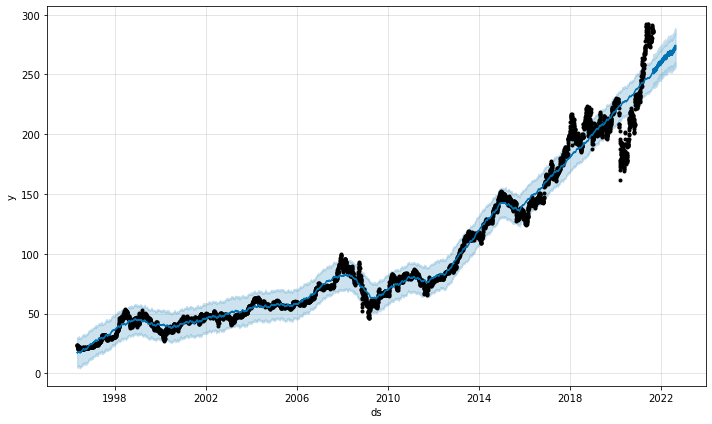

In [6]:
m.plot(forecast);

## Make it a Function

In [7]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05,14.610767,13.604995,15.436794,14.610767,14.610767,-0.086825,-0.086825,-0.086825,-0.094884,-0.094884,-0.094884,0.008060,0.008060,0.008060,0.0,0.0,0.0,14.523942
1,2017-05-08,14.610665,13.681059,15.475711,14.610665,14.610665,-0.032196,-0.032196,-0.032196,-0.093916,-0.093916,-0.093916,0.061720,0.061720,0.061720,0.0,0.0,0.0,14.578469
2,2017-05-09,14.610631,13.738011,15.526288,14.610631,14.610631,-0.006175,-0.006175,-0.006175,-0.086958,-0.086958,-0.086958,0.080783,0.080783,0.080783,0.0,0.0,0.0,14.604456
3,2017-05-10,14.610597,13.660658,15.516310,14.610597,14.610597,-0.003326,-0.003326,-0.003326,-0.103401,-0.103401,-0.103401,0.100075,0.100075,0.100075,0.0,0.0,0.0,14.607271
4,2017-05-11,14.610563,13.672616,15.552475,14.610563,14.610563,0.020895,0.020895,0.020895,-0.098501,-0.098501,-0.098501,0.119396,0.119396,0.119396,0.0,0.0,0.0,14.631458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2022-02-19,24.777347,23.802885,26.899023,23.559093,26.064665,0.612381,0.612381,0.612381,0.238830,0.238830,0.238830,0.373551,0.373551,0.373551,0.0,0.0,0.0,25.389729
1263,2022-02-20,24.795018,23.863375,27.065464,23.564533,26.095255,0.639648,0.639648,0.639648,0.238830,0.238830,0.238830,0.400818,0.400818,0.400818,0.0,0.0,0.0,25.434666
1264,2022-02-21,24.812689,23.548885,26.794420,23.573992,26.122484,0.328329,0.328329,0.328329,-0.093916,-0.093916,-0.093916,0.422246,0.422246,0.422246,0.0,0.0,0.0,25.141019
1265,2022-02-22,24.830361,23.484019,26.756826,23.581792,26.150157,0.349940,0.349940,0.349940,-0.086958,-0.086958,-0.086958,0.436898,0.436898,0.436898,0.0,0.0,0.0,25.180301


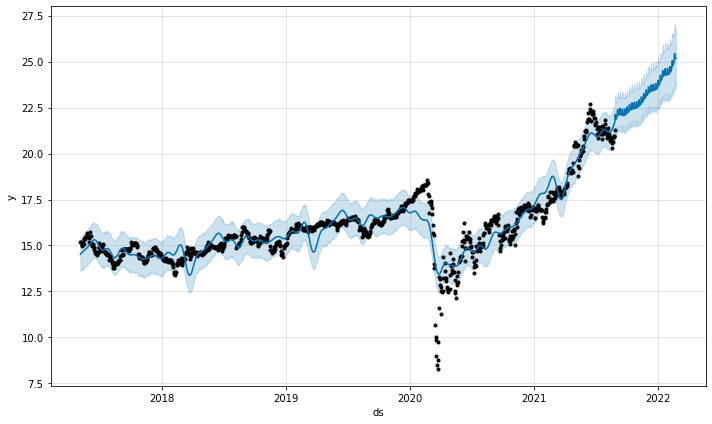

In [8]:
# kkr real estate finance trust
make_forecast('KREF', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2458,2023-08-23,84.231387,18.519454,143.484880,19.294999,145.536841,-1.490573,-1.490573,-1.490573,0.778353,0.778353,0.778353,-2.268926,-2.268926,-2.268926,0.0,0.0,0.0,82.740814
2459,2023-08-24,84.288645,17.373748,144.297773,19.180559,145.694386,-1.233136,-1.233136,-1.233136,0.899995,0.899995,0.899995,-2.133131,-2.133131,-2.133131,0.0,0.0,0.0,83.055509
2460,2023-08-25,84.345903,17.501508,145.737404,19.063895,145.940406,-1.086120,-1.086120,-1.086120,0.914683,0.914683,0.914683,-2.000803,-2.000803,-2.000803,0.0,0.0,0.0,83.259783
2461,2023-08-26,84.403161,14.859743,142.591132,18.926008,146.186427,-3.982327,-3.982327,-3.982327,-2.108418,-2.108418,-2.108418,-1.873909,-1.873909,-1.873909,0.0,0.0,0.0,80.420833
2462,2023-08-27,84.460419,14.650710,142.454926,18.850201,146.432448,-3.862598,-3.862598,-3.862598,-2.108418,-2.108418,-2.108418,-1.754180,-1.754180,-1.754180,0.0,0.0,0.0,80.597820


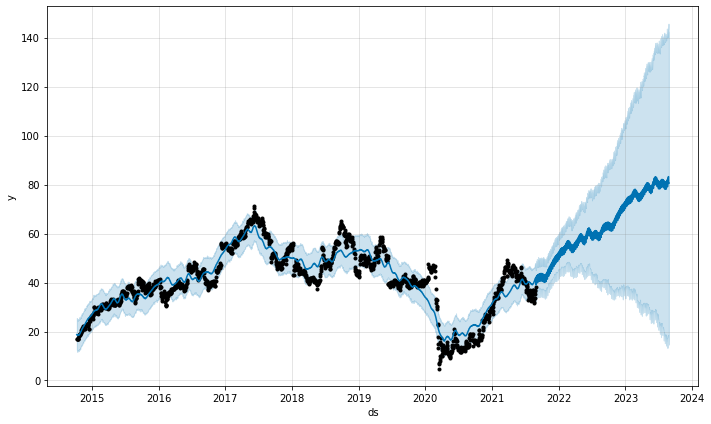

In [9]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
1132,2021-08-28,73.470991,70.049498,76.760834
1133,2021-08-29,73.566946,69.973602,77.088854
1134,2021-08-30,72.573995,69.241412,75.807131
1135,2021-08-31,72.678690,69.322826,76.014488
1136,2021-09-01,72.868294,69.620939,76.310639
...,...,...,...,...
1492,2022-08-23,118.706478,102.400494,135.837658
1493,2022-08-24,118.762723,102.280576,135.967056
1494,2022-08-25,118.738761,102.413745,136.780714
1495,2022-08-26,118.998471,103.054766,136.352338


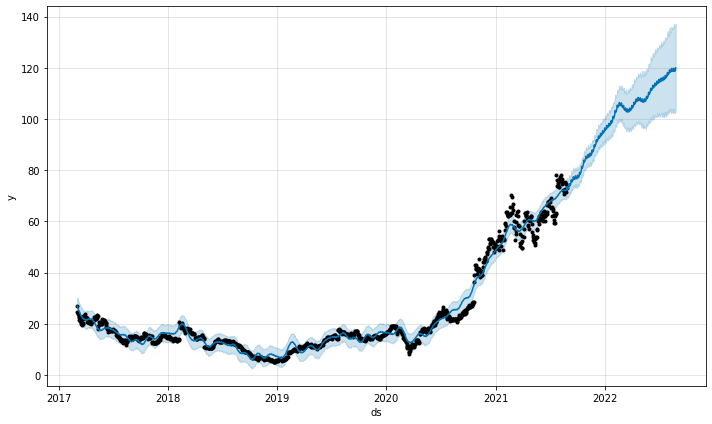

In [10]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('SNAP', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast